# Diamond Price Prediction 

---

### Context

Diamond is one of the precious stones which are always in huge demand in the investment market. Diamonds are also used in many industrial applications like cutting but it is mostly used as a gemstone. The actual price of a diamond however is determined by a gemologist after examining its various features such as its carat, cut, color, and clarity. Dimensions of a diamond is also a very important parameter to determine its worth. Nearly, 142 million carats of diamonds were produced worldwide in 2019 alone. This makes it very important to come up with some smart technique to estimate its worth. 




 
 

---

### Problem Statement

A diamond distributor decided to put almost 2000 diamonds for auction. A jewellery company is interested in making a bid to purchase these diamonds in order to expand their business. As a data scientist, your job is to build a prediction model to predict the price of diamonds so that your company knows how much it should bid.













---

---

### Data Description

The **diamonds** dataset contains the prices and other attributes of almost 54,000 diamonds. Following are the attributes:  


|Column|Description|
|---:|:---|
|`carat`|weight of the diamond|
|`cut`|quality of the cut|
|`color`|diamond colour, from J (worst) to D (best)|
|`clarity`|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|`table`|The width of the diamond's table expressed as a percentage of its average diameter|
|`price`|price in US dollars|
|`x`|length in mm|
|`y`|width in mm|
|`z`|depth in mm|
|`depth`|total depth percentage = $\frac{2z}{x + y}$|


---

### Things To Do

1. Explore the diamond dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes.

3. Create a correlation heatmap for all the columns.

4. Build a linear regression model by selecting the most relevant features to predict the price of diamonds.

5. Reduce multicollinearity (if exists) by eliminating highly correlated and high VIF features.

5. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals.



---

#### 1. Import Modules and Load Dataset

Link to the dataset: https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


In [71]:
# Importing the required modules and loading the dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
# Getting the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [73]:
# Checking if there are any null values. If any column has null values, treating them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [74]:
# Dropping 'Unnamed: 0' column as it is of no use
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.


- Creating Box plots between each categorical variable and the target variable price to sense the distribution of values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


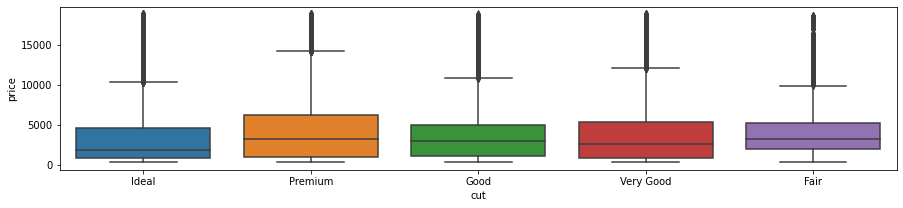

In [75]:
# Boxplot for 'cut' vs 'price'
plt.figure(figsize=(15,3))
sns.boxplot(df["cut"],df["price"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


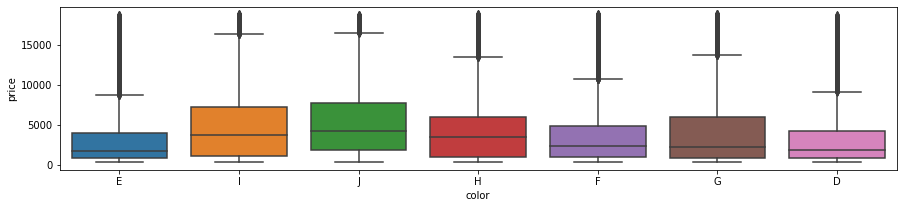

In [76]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize=(15,3))
sns.boxplot(df["color"],df["price"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


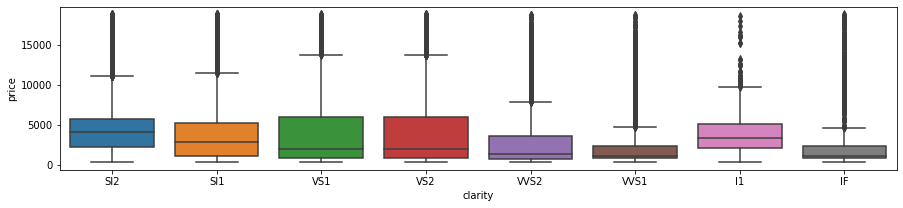

In [77]:
# Boxplot for 'clarity' vs 'price'
plt.figure(figsize=(15,3))
sns.boxplot(df["clarity"],df["price"])
plt.show()

- Creating the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

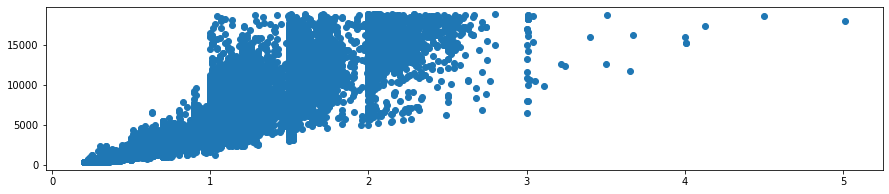

In [78]:
# Creating scatter plot with 'carat' on X-axis and 'price' on Y-axis
plt.figure(figsize=(15,3))
plt.scatter(df["carat"],df["price"])
plt.show()

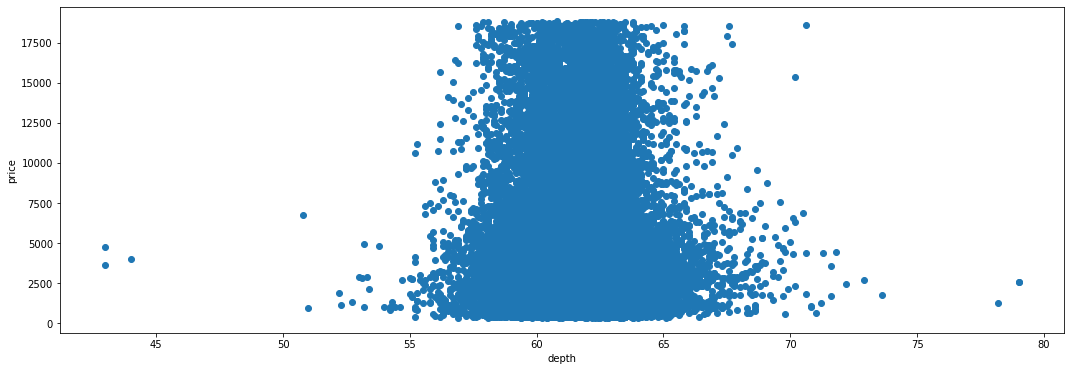

In [79]:
# Creating scatter plot with 'depth' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18,6))
a=df.iloc[:,4]
b=df.iloc[:,6]
plt.scatter(a,b)
plt.xlabel("depth")
plt.ylabel("price")
plt.show()

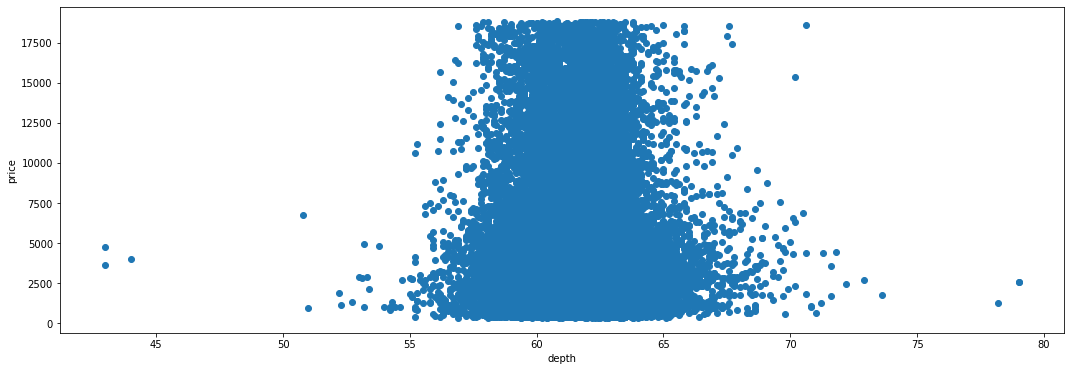

In [80]:
plt.figure(figsize=(18,6))
plt.scatter(df['depth'],df['price'])
plt.xlabel("depth")
plt.ylabel("price")
plt.show()


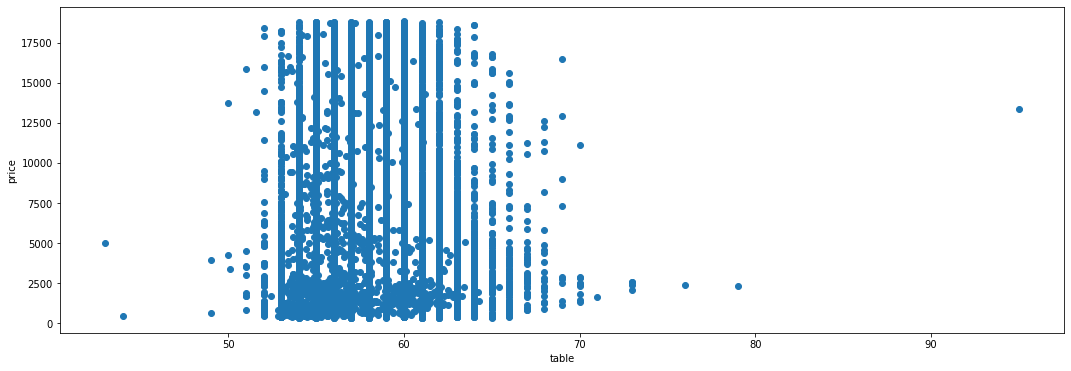

In [81]:
# Creating scatter plot with 'table' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18,6))
plt.scatter(df["table"],df["price"])
plt.xlabel("table")
plt.ylabel("price")
plt.show()

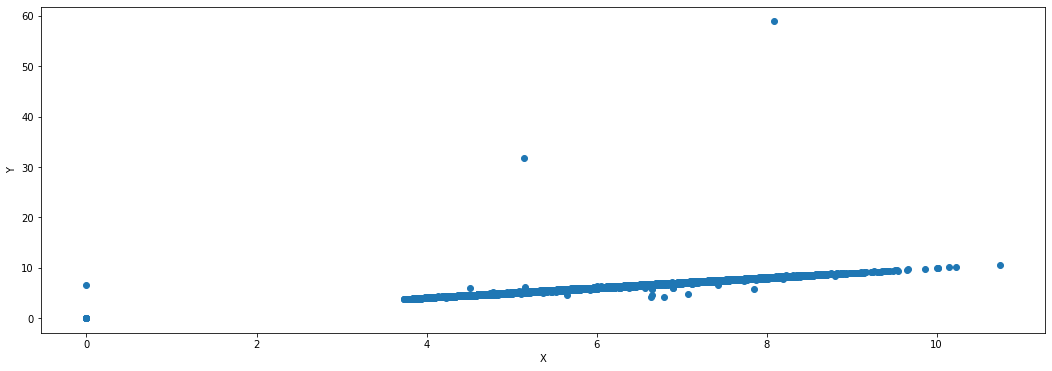

In [82]:
# Creating scatter plot with attribute 'x' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18,6))
plt.scatter(df["x"],df["y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

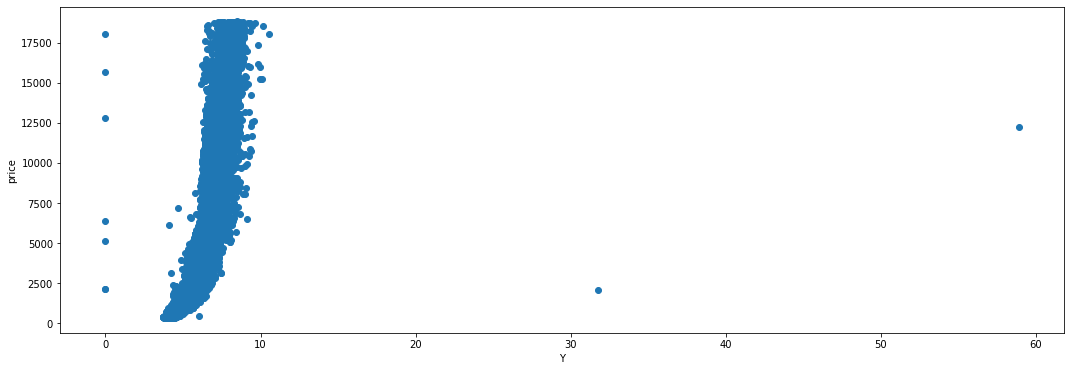

In [83]:
# Creating scatter plot with attribute 'y' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18,6))
plt.scatter(df["y"],df["price"])
plt.xlabel("Y")
plt.ylabel("price")
plt.show()

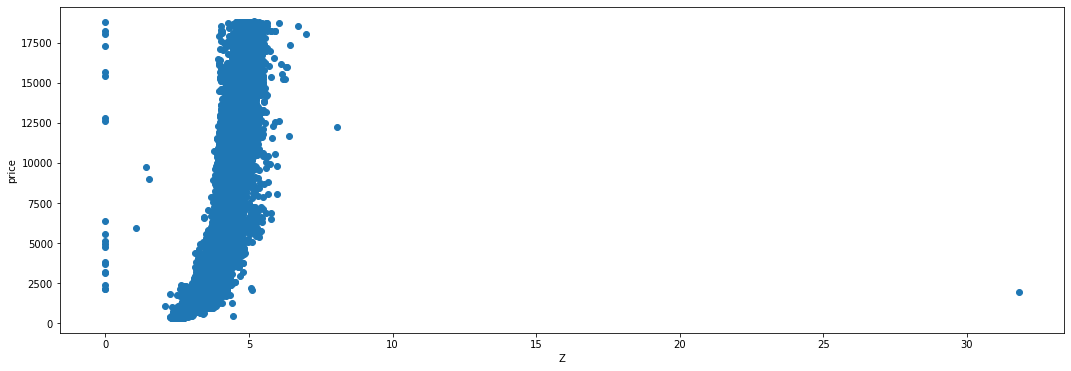

In [84]:
# Creating scatter plot with 'z' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18,6))
plt.scatter(df["z"],df["price"])
plt.xlabel("Z")
plt.ylabel("price")
plt.show()

- "carat"attribute exhibit the best linear relationship with the target variable 'price'

- Createing a normal distribution curve for the `price`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


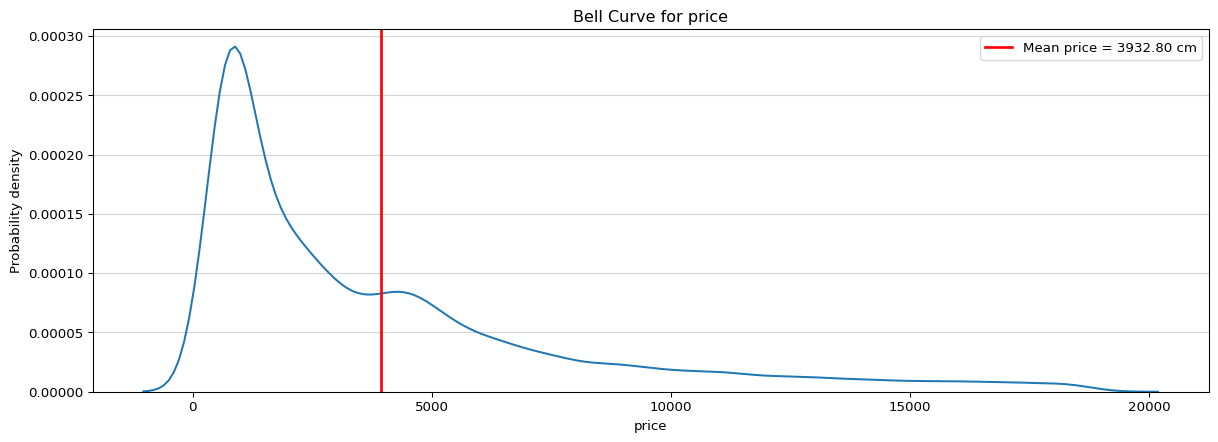

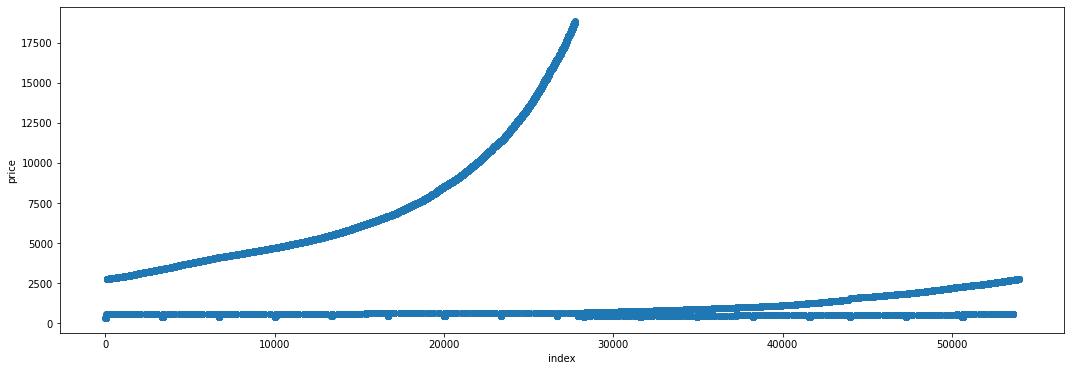

In [85]:
# Creating a normal distribution curve for the `price`.
price=df['price']
plt.figure(figsize=(15, 5), dpi=96)
plt.title("Bell Curve for price")
sns.distplot(df['price'], hist=False, bins='sturges') 
plt.axvline(np.mean(price), color='red', label=f'Mean price = {np.mean(price):.2f} cm', linewidth=2)
plt.xlabel("price")
plt.ylabel("Probability density")
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()
# Create a probablity density function for plotting the normal distribution
def prob_density_func(arr, mean, std):
  coeff = 1 / (std * np.sqrt(2 * np.pi))
  power_of_e = np.exp(-(arr - mean) ** 2 / (2 * std ** 2))
  prob = coeff * power_of_e
  return prob


# Plotting the normal distribution curve using plt.scatter() 
plt.figure(figsize=(18,6))
plt.scatter(df.index,df['price'])
plt.xlabel("index")
plt.ylabel("price")
plt.show()

In [86]:
df.shape

(53940, 10)

- The mean price of diamonds is 3932.80cm



---

#### 3. Feature Engineering

The dataset contains certain features that are categorical.  To convert these features into numerical ones, use `replace()` function of the DataFrame. 



In [87]:
# Replacing values of 'cut' column
df["cut"].replace({"Fair": 1, "Good": 2,"Very Good":3,"Premium": 4,"Ideal": 5}, inplace=True)

In [88]:
# Replacing values of 'color' column
df["color"].replace({"D": 1, "E": 2,"F":3,"G": 4,"H": 5,"I": 6,"J": 7}, inplace=True)

In [89]:
# Replacing values of 'clarity' column
df["clarity"].replace({"I1": 1, "SI2": 2,"SI1":3,"VS2": 4,"VS1": 5,"VVS2":6,"VVS1":7,"IF": 8}, inplace=True)

In [90]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


---

#### 4. Model Training 

Build a multiple linear regression model  using all the features of the dataset. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.


In [91]:
# Creating a list of feature variables.
feature=list(df.columns.values[:])
feature.remove('price')
feature

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [92]:
# Building multiple linear regression model using all the features
# Split the DataFrame into the train and test sets such that test set has 33% of the values.
# Build linear regression model using the 'sklearn.linear_model' module.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
feature = list(df.columns.values[:])
feature.remove('price')
X = df[feature]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)



print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       5423.680710
carat           10720.976566
cut             118.658153
color           -323.814246
clarity         504.014258
depth           -79.948794
table           -28.248563
x               -846.553635
y               23.150374
z               -29.512329


In [93]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [95]:
# Evaluating the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.907
Mean Squared Error: 1494736.330
Root Mean Squared Error: 1222.594
Mean Absolute Error: 809.247


Test Set
--------------------------------------------------
R-squared: 0.907
Mean Squared Error: 1450250.583
Root Mean Squared Error: 1204.264
Mean Absolute Error: 802.626


The $R^2$ (R-squared) value for this model is  "0.907"



### 5. Dealing with Multicollinearity

Creating a heatmap among all variables to identify a set of features which are highly correlated with each other.


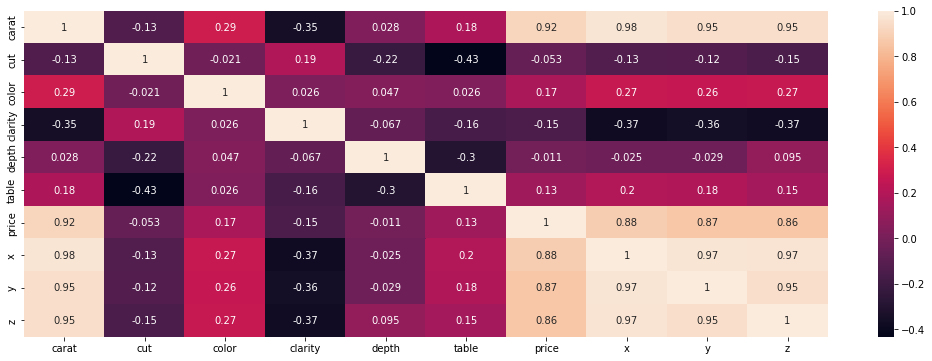

In [96]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [97]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
feature=list(df.columns.values[:])
X = df[feature]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the value
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     -1.452172e-12
carat      6.448841e-12
cut        2.430695e-14
color     -1.492001e-13
clarity    2.015679e-13
depth     -4.551914e-15
table     -4.234460e-14
price      1.000000e+00
x          1.811884e-13
y         -1.746381e-13
z         -2.200184e-13
dtype: float64

In [98]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.789e+34
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:23:27   Log-Likelihood:             9.2601e+05
No. Observations:               36139   AIC:                        -1.852e+06
Df Residuals:                   36128   BIC:                        -1.852e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.452e-12   7.67e-13     -1.892      0.0

- "carat" is highly positively related with price  and on the other hand clarity is highly negatively related with the price


- The condition number is large, 4.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


Let's consider the feature `carat` as it is highly correlated with the target variable `price`. Perform the following tasks:
1. Drop the features which are highly correlated with `carat`.
2. Calculate VIF (Variance Inflation Factor) for the remaining features.


In [99]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74


In [100]:
# Drop features highly correlated with 'carat'
df.drop(columns=['x','y','z'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,5,2,2,61.5,55.0,326
1,0.21,4,2,3,59.8,61.0,326
2,0.23,2,2,5,56.9,65.0,327
3,0.29,4,6,4,62.4,58.0,334
4,0.31,2,7,2,63.3,58.0,335


In [101]:
df_1=df
df_1

,carat,cut,color,clarity,depth,table,price
0,0.23,5,2,2,61.5,55.0,326
1,0.21,4,2,3,59.8,61.0,326
2,0.23,2,2,5,56.9,65.0,327
3,0.29,4,6,4,62.4,58.0,334
4,0.31,2,7,2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757
53936,0.72,2,1,3,63.1,55.0,2757
53937,0.70,3,1,3,62.8,60.0,2757
53938,0.86,4,5,2,61.0,58.0,2757


In [102]:
# Again build a linear regression model using the remaining features


# Build linear regression model using the 'sklearn.linear_model' module.


# Print the value of the intercept


# Print the names of the features along with the values of their corresponding coefficients.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
feature_1 = list(df_1.columns.values[:])
feature_1.remove('price')
X1 = df_1[feature_1]
y1 = df_1['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.
y1_train_reshaped = y1_train.values.reshape(-1, 1)
y1_test_reshaped = y1_test.values.reshape(-1, 1)
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X1_train, y1_train_reshaped)



print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.
for item in list(zip(X1.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       -150.874647
carat           8799.498060
cut             119.798149
color           -319.163784
clarity         523.049968
depth           -45.019209
table           -27.742288


In [103]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y1_train_pred = sklearn_lin_reg.predict(X1_train)
y1_test_pred = sklearn_lin_reg.predict(X1_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y1_train_reshaped, y1_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y1_train_reshaped, y1_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y1_train_reshaped, y1_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y1_train_reshaped, y1_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y1_test_reshaped, y1_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y1_test_reshaped, y1_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y1_test_reshaped, y1_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y1_test_reshaped, y1_test_pred):.3f}")


Train Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1534955.812
Root Mean Squared Error: 1238.933
Mean Absolute Error: 857.542


Test Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1494513.472
Root Mean Squared Error: 1222.503
Mean Absolute Error: 850.554


Now eliminate the features having VIF values above 10 (if any).

In [104]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.

# Add a constant to feature variables 

# Create a dataframe that will contain the names of the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1=pd.DataFrame()
vif_1['Features']=X1_train.columns
vif_1['VIF']=[variance_inflation_factor(X1_train.values,i) for i in range(X1_train.values.shape[1])]
vif_1['VIF']=round(vif_1['VIF'],2)
vif_=vif_1.sort_values('VIF',ascending=False)
print(vif_)

  Features     VIF
4    depth  445.80
5    table  410.27
1      cut   13.65
3  clarity    8.35
2    color    6.11
0    carat    4.94


- (depth:445.80) , (table:410.27) , (cut:13.65) are the features having VIF values above 10

In [105]:
df_1

,carat,cut,color,clarity,depth,table,price
0,0.23,5,2,2,61.5,55.0,326
1,0.21,4,2,3,59.8,61.0,326
2,0.23,2,2,5,56.9,65.0,327
3,0.29,4,6,4,62.4,58.0,334
4,0.31,2,7,2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757
53936,0.72,2,1,3,63.1,55.0,2757
53937,0.70,3,1,3,62.8,60.0,2757
53938,0.86,4,5,2,61.0,58.0,2757


In [106]:
v=vif_1[vif_1['VIF']<10]
v_l=list(v['Features'].values)
v_l

['carat', 'color', 'clarity']

In [107]:
# Creating a list of features having VIF values less than 10 
df_2=df_1[v_l]
df_2

,carat,color,clarity
0,0.23,2,2
1,0.21,2,3
2,0.23,2,5
3,0.29,6,4
4,0.31,7,2
...,...,...,...
53935,0.72,1,3
53936,0.72,1,3
53937,0.70,1,3
53938,0.86,5,2


In [108]:
df_1['price']

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [109]:
# Again building a linear regression model using the features whose VIF values are less than 10 
# Building linear regression model using the 'sklearn.linear_model' module.
# Print the value of the intercept
# Print the names of the features along with the values of their corresponding coefficients.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
feature_2 = list(df_2.columns.values[:])
X2 = df_2[feature_2]
y2 = df_1['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.
y2_train_reshaped = y2_train.values.reshape(-1, 1)
y2_test_reshaped = y2_test.values.reshape(-1, 1)
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X2_train, y2_train_reshaped)



print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.
for item in list(zip(X2.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       -4097.725093
carat           8759.726397
color           -321.085120
clarity         542.601366


In [118]:
df_2.columns

Index(['carat', 'color', 'clarity'], dtype='object')

In [116]:
feature_2

['carat', 'color', 'clarity']

In [120]:
df_2

,carat,color,clarity
0,0.23,2,2
1,0.21,2,3
2,0.23,2,5
3,0.29,6,4
4,0.31,7,2
...,...,...,...
53935,0.72,1,3
53936,0.72,1,3
53937,0.70,1,3
53938,0.86,5,2


In [121]:
X2

,carat,color,clarity
0,0.23,2,2
1,0.21,2,3
2,0.23,2,5
3,0.29,6,4
4,0.31,7,2
...,...,...,...
53935,0.72,1,3
53936,0.72,1,3
53937,0.70,1,3
53938,0.86,5,2


In [128]:
X2_test

,carat,color,clarity
1388,0.24,4,7
50052,0.58,3,6
41645,0.40,2,6
42377,0.43,2,6
17244,1.55,2,2
...,...,...,...
31474,0.34,5,5
22112,1.24,3,5
134,0.77,5,5
31314,0.32,2,5


In [110]:
# Evaluating the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y2_train_pred = sklearn_lin_reg.predict(X2_train)
y2_test_pred = sklearn_lin_reg.predict(X2_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y2_train_reshaped, y2_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y2_train_reshaped, y2_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y2_train_reshaped, y2_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y2_train_reshaped, y2_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y2_test_reshaped, y2_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y2_test_reshaped, y2_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y2_test_reshaped, y2_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y2_test_reshaped, y2_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.902
Mean Squared Error: 1567402.906
Root Mean Squared Error: 1251.960
Mean Absolute Error: 865.607


Test Set
--------------------------------------------------
R-squared: 0.902
Mean Squared Error: 1527356.494
Root Mean Squared Error: 1235.863
Mean Absolute Error: 859.137


In [111]:
# Again calculating the VIF values for the remaining features to find out if there is still multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_2=pd.DataFrame()
vif_2['Features']=X2_train.columns
vif_2['VIF']=[variance_inflation_factor(X2_train.values,i) for i in range(X2_train.values.shape[1])]
vif_2['VIF']=round(vif_2['VIF'],2)
vif_s2=vif_2.sort_values('VIF',ascending=False)
print(vif_s2)

  Features   VIF
1    color  5.51
2  clarity  3.45
0    carat  3.43


---

#### 6. Residual (Error) Analysis

we will perform residual analysis to check if the residuals (errors) are normally distributed or not (which is one of the assumption of linear regression). For this, plot the  histogram of the residuals.

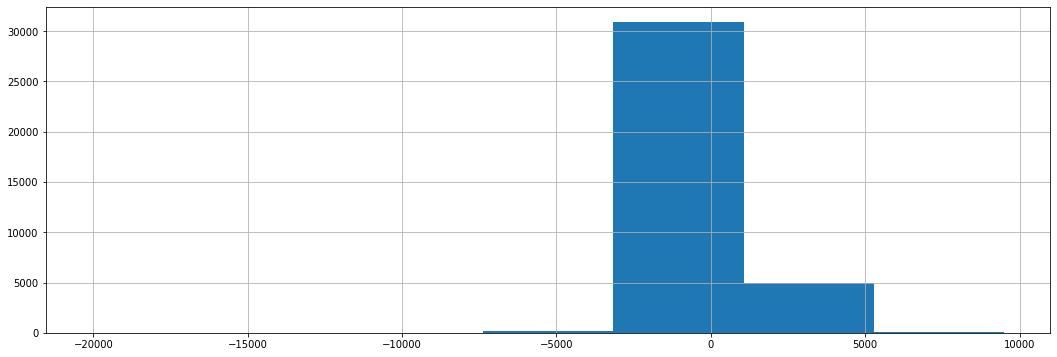

Mean of error for training data is : -1.5301275040204223e-14


In [112]:
# Creating a histogram for the errors obtained in the predicted values for the train set.
error_train_2=y2_train_reshaped-y2_train_pred
plt.figure(figsize=(18,6))
plt.hist(error_train_2,bins=7)
plt.grid()
plt.show()
print("Mean of error for training data is :",error_train_2.mean())

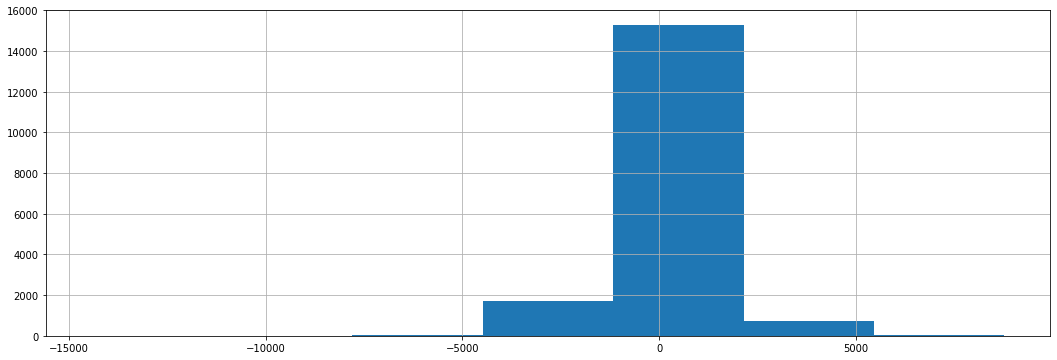

Mean of error for testing data is : -9.861983045733044


In [113]:
# Create a histogram for the errors obtained in the predicted values for the test set.
error_test_2=y2_test_reshaped-y2_test_pred
plt.figure(figsize=(18,6))
plt.hist(error_test_2,bins=7)
plt.grid()
plt.show()
print("Mean of error for testing data is :",error_test_2.mean())

- the mean of errors equal to 0 for train set aprrox zero :-15301275040204223e-14
- mean of error for testing data is not zero its : 9.861983045733044